In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 




In [19]:
df = pd.read_csv('../../Data/d_train_20180102.csv')

In [120]:
def custom_boxplot(df,baseVar,checkVar,category=True,bins=10):
    dfPlot = df.copy()
    if baseVar == checkVar:
        print(dfPlot[checkVar].T.values.tolist())
        plt.boxplot(dfPlot[checkVar].T.values.tolist(), labels =checkVar)  
        plt.show()
    else:
        if category:
            dfPlot = dfPlot.set_index(dfPlot[baseVar])
            plt.boxplot([dfPlot.loc[var,checkVar].tolist() for var in dfPlot[baseVar].unique()],labels =dfPlot[baseVar].unique()) 
            plt.show()
        else:
            dfPlot['bins'] = pd.qcut(dfPlot[baseVar],q=bins,labels=range(bins))
            dfPlot.sort_values('bins',ascending=True,inplace=True)
            dfPlot['bins'] = dfPlot['bins'].astype(str)
            dfPlot['bins'] = dfPlot['bins'].fillna('nan')
            print(dfPlot['bins'].unique())
            dfOutput = dfPlot.groupby(['bins'])
            data = []
            label =[]
            for name,grp in dfOutput:
                label.append(name)
                data.append(grp[checkVar].values.tolist())
            plt.boxplot(data,labels =label) 
            plt.show()


In [20]:
df.describe(percentiles=[.75,.8,.85,.9,.95,.99])

,ID,sex,age,PartI_1,PartI_2,PartI_3,PartI_4,PartI_5,PartI_6,PartI_7,...,PartVI_1,PartVI_2,PartVI_3,PartVI_4,PartV_9,PartV_10,PartV_11,PartV_12,PartV_13,Y
count,5642.000000,5641.000000,5642.000000,4421.000000,4421.00000,4421.000000,4421.000000,4421.000000,4421.000000,4421.000000,...,5626.000000,5619.000000,5619.000000,5619.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5642.000000
mean,2866.184155,0.509839,45.580468,26.805892,27.65202,87.482278,38.823762,76.771108,45.822504,30.948604,...,253.085318,10.653444,13.304414,0.267907,56.718468,33.778546,6.856772,2.043797,0.603697,5.631925
std,1655.555649,0.499948,12.961946,13.563003,22.61152,25.630897,40.788282,4.016055,2.617401,3.565997,...,59.586828,0.985484,2.173716,0.060503,7.799940,7.253097,1.567583,1.710901,0.291760,1.544882
min,1.000000,0.000000,3.000000,10.040000,0.12000,22.980000,6.360000,57.320000,29.540000,7.060000,...,37.000000,7.100000,8.000000,0.042000,14.400000,7.500000,3.100000,0.000000,0.000000,3.070000
50%,2870.500000,1.000000,45.000000,23.890000,21.48000,84.470000,26.190000,76.630000,45.820000,30.780000,...,249.000000,10.600000,12.900000,0.260000,56.700000,33.600000,6.700000,1.600000,0.600000,5.290000
75%,4302.750000,1.000000,54.000000,29.270000,32.30000,100.210000,43.850000,79.530000,47.570000,33.180000,...,289.000000,11.300000,14.600000,0.300000,62.000000,38.500000,7.700000,2.600000,0.700000,5.767500
80%,4588.800000,1.000000,56.000000,30.960000,36.03000,104.640000,50.940000,80.210000,47.970000,33.750000,...,300.000000,11.400000,15.100000,0.320000,63.100000,39.800000,8.000000,2.900000,0.800000,5.930000
85%,4871.850000,1.000000,59.000000,33.300000,41.23000,110.380000,59.660000,81.000000,48.540000,34.480000,...,313.000000,11.600000,15.800000,0.330000,64.625000,41.200000,8.400000,3.400000,0.900000,6.168500
90%,5155.900000,1.000000,63.000000,37.670000,48.80000,117.360000,73.870000,81.900000,49.140000,35.420000,...,328.500000,11.900000,16.500000,0.340000,66.500000,43.100000,8.800000,4.100000,1.000000,6.680000
95%,5441.950000,1.000000,68.000000,45.730000,64.14000,129.880000,110.090000,83.250000,50.080000,36.800000,...,354.000000,12.300000,17.100000,0.370000,69.500000,45.800000,9.600000,5.175000,1.100000,7.979000


In [15]:
print(df.loc[(df[var]>=df[var].quantile(0.1))&(df[var]<=df[var].quantile(0.9)),var])

0       6.06
1       5.39
2       5.59
4       5.42
5       5.97
6       5.11
7       5.94
8       5.66
9       5.48
11      5.48
12      5.32
13      5.08
15      4.92
17      4.66
18      6.58
21      5.16
22      5.13
24      5.17
25      4.64
26      5.82
27      6.29
28      5.10
29      5.41
30      5.48
31      6.44
32      5.53
33      5.31
34      5.52
35      4.70
36      5.13
        ... 
5609    5.70
5612    5.32
5613    5.63
5614    4.84
5615    5.44
5616    4.79
5617    4.82
5618    5.25
5619    4.71
5620    6.64
5621    5.56
5622    5.07
5623    5.60
5624    5.32
5625    5.40
5626    5.39
5628    5.52
5629    5.29
5630    5.43
5631    5.58
5632    5.18
5633    5.25
5634    5.15
5635    6.01
5636    5.11
5637    5.45
5638    5.13
5639    5.24
5640    6.37
5641    6.00
Name: Y, Length: 4533, dtype: float64


ID
5642
5732
1


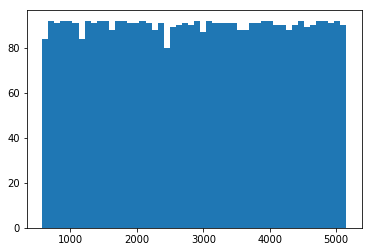

sex
2
1.0
0.0


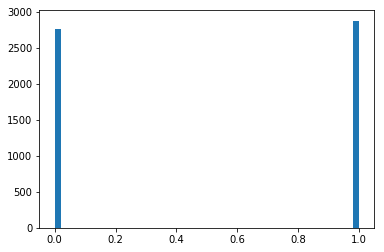

age
76
93
3


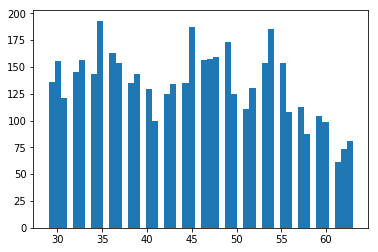

date
30
31/10/2017
09/10/2017
date can not be plotted
PartI_1
2164
434.95
10.04


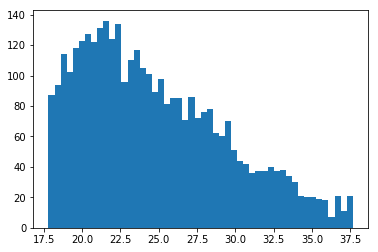

PartI_2
2766
498.89
0.12


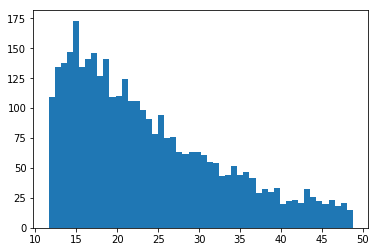

PartI_3
3432
374.32
22.98


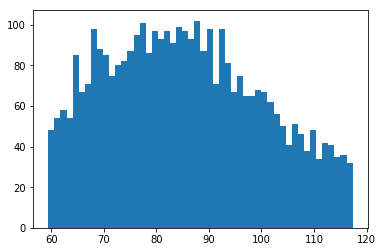

PartI_4
3063
736.99
6.36


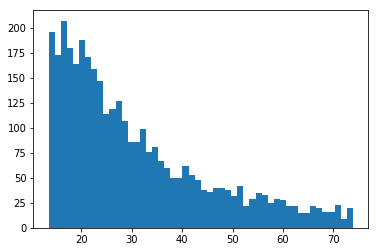

PartI_5
1527
100.41
57.32


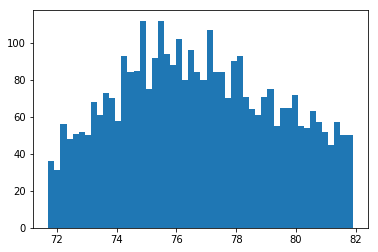

PartI_6
1088
54.08
29.54


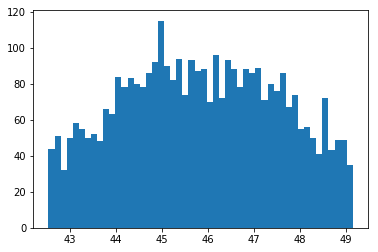

PartI_7
1390
66.18
7.06


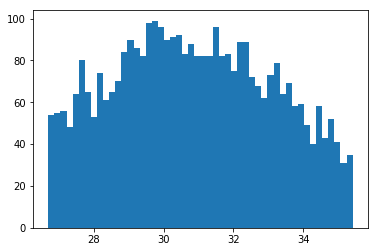

PartI_8
143
7.12
0.52


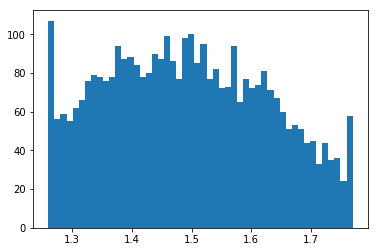

PartII_1
534
41.57
0.27


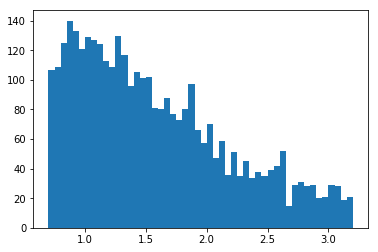

PartII_2
524
20.46
1.85


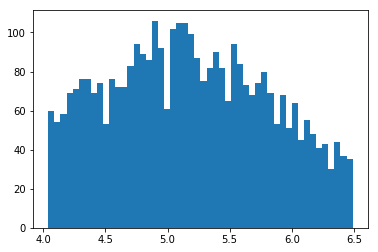

PartII_3
191
5.28
0.54


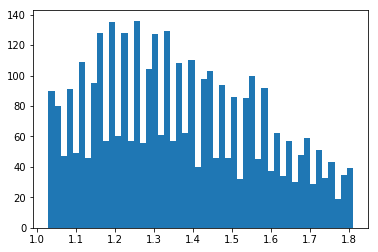

PartII_4
457
8.46
0.56


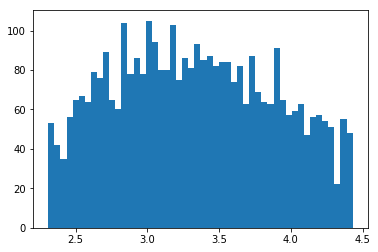

PartIII_1
630
13.39
1.5


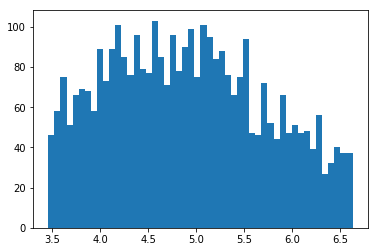

PartIII_2
1841
177.42
39.43


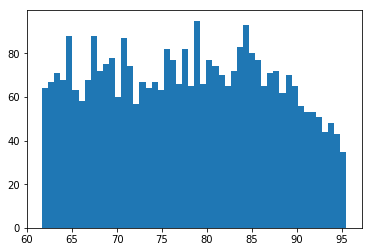

PartIII_3
3995
774.06
118.67


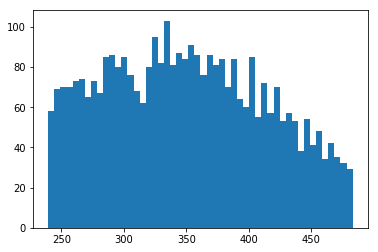

PartIV_1
87
44.35
0.0


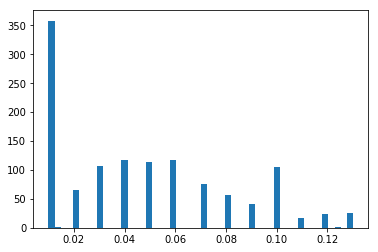

PartIV_2
793
42.49
0.0


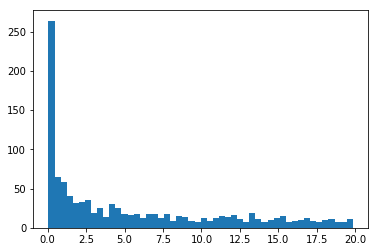

PartIV_3
41
17.52
0.01


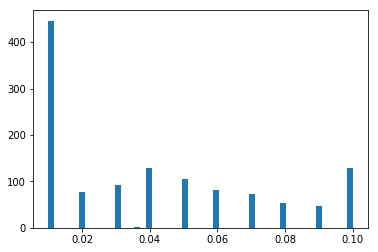

PartIV_4
375
7.17
0.0


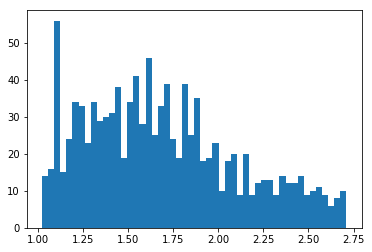

PartIV_5
442
17.09
0.0


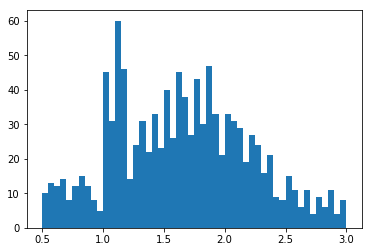

PartV_1
785
21.06
2.8


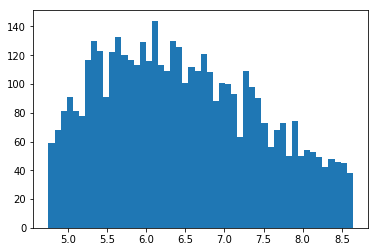

PartV_2
292
6.85
3.01


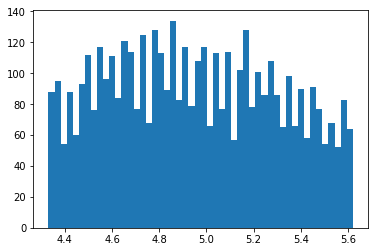

PartV_3
353
204.0
65.0


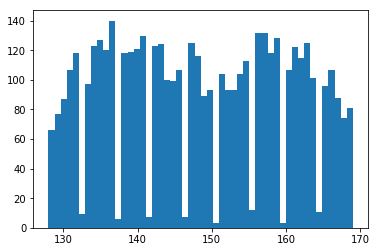

PartV_4
256
0.599
0.239


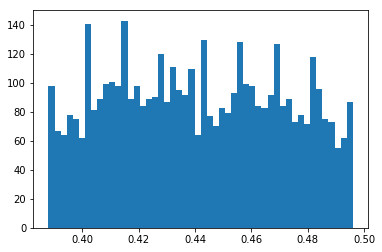

PartV_5
315
113.0
59.0


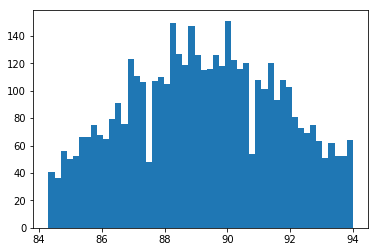

PartV_6
175
44.7
16.0


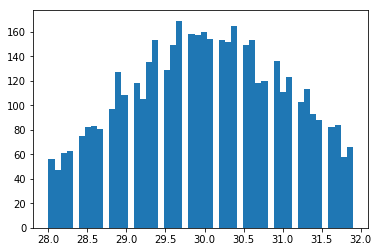

PartV_7
101
462.0
270.0


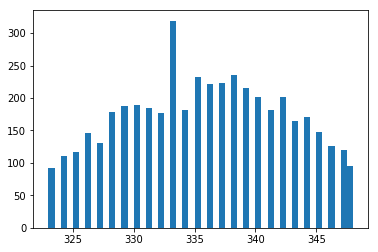

PartV_8
90
23.8
10.9


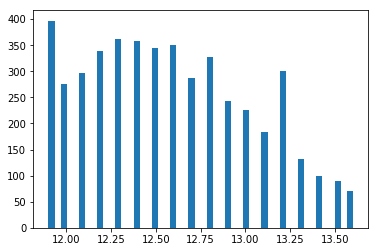

PartVI_1
359
745.0
37.0


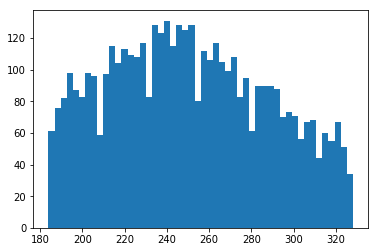

PartVI_2
75
15.2
7.1


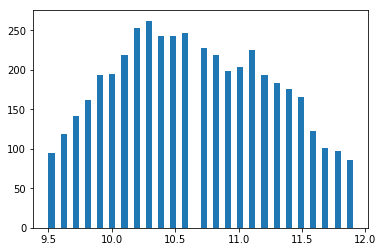

PartVI_3
142
25.3
8.0


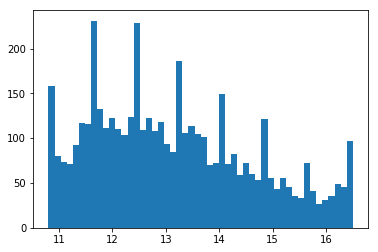

PartVI_4
180
0.71
0.042


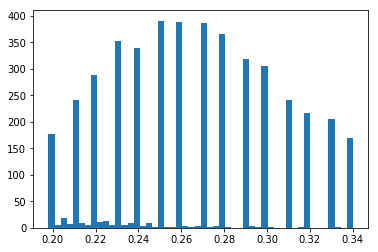

PartV_9
444
88.5
14.4


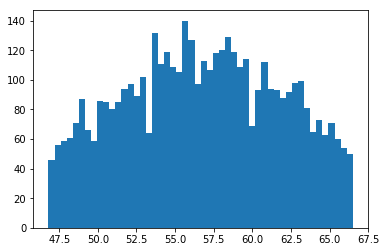

PartV_10
410
76.3
7.5


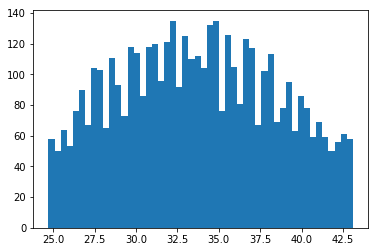

PartV_11
114
23.2
3.1


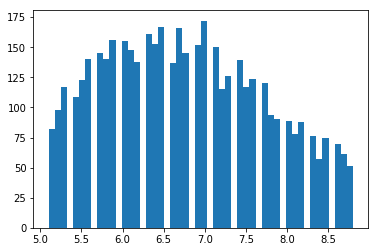

PartV_12
124
22.5
0.0


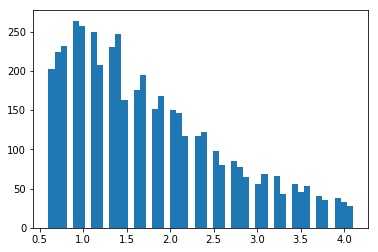

PartV_13
27
3.5
0.0


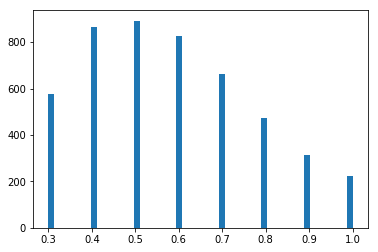

Y
611
38.43
3.07


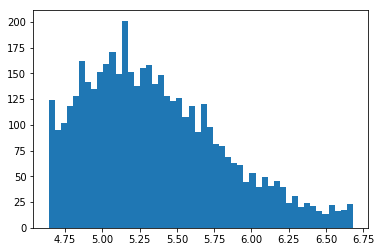

In [17]:
for var in df:
    print(var)
    print(df[var].nunique())
    print(df[var].max())
    print(df[var].min())
    try:
        plt.hist(df.loc[(df[var]>=df[var].quantile(0.1))&(df[var]<=df[var].quantile(0.9)),var],bins=50)
        plt.show()
    except:
        print('%s can not be plotted'%var)
        continue

In [55]:
a,b = pd.cut(df['PartI_1'],bins=10,retbins =True,labels=range(10))


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
5612    0.0
5613    NaN
5614    NaN
5615    0.0
5616    0.0
5617    0.0
5618    0.0
5619    0.0
5620    0.0
5621    0.0
5622    0.0
5623    0.0
5624    0.0
5625    0.0
5626    0.0
5627    0.0
5628    0.0
5629    0.0
5630    0.0
5631    0.0
5632    1.0
5633    0.0
5634    0.0
5635    0.0
5636    0.0
5637    0.0
5638    0.0
5639    0.0
5640    0.0
5641    0.0
Name: PartI_1, Length: 5642, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]